In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep=';')
complains = df["Complain"].sum()
print(complains)
df['Age'] = 2024 - df['Year_Birth'].astype(int)
df["Purchases"] = df.filter(like='Mnt').sum(axis = 1)
mean_age = df.loc[df["Purchases"] > 0, 'Age'].mean()
print(mean_age)
mean_age_all = df.loc[:, 'Age'].mean()
print(mean_age_all)

21
55.19419642857143
55.19419642857143


возраст не отличается

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='All_purchases'>

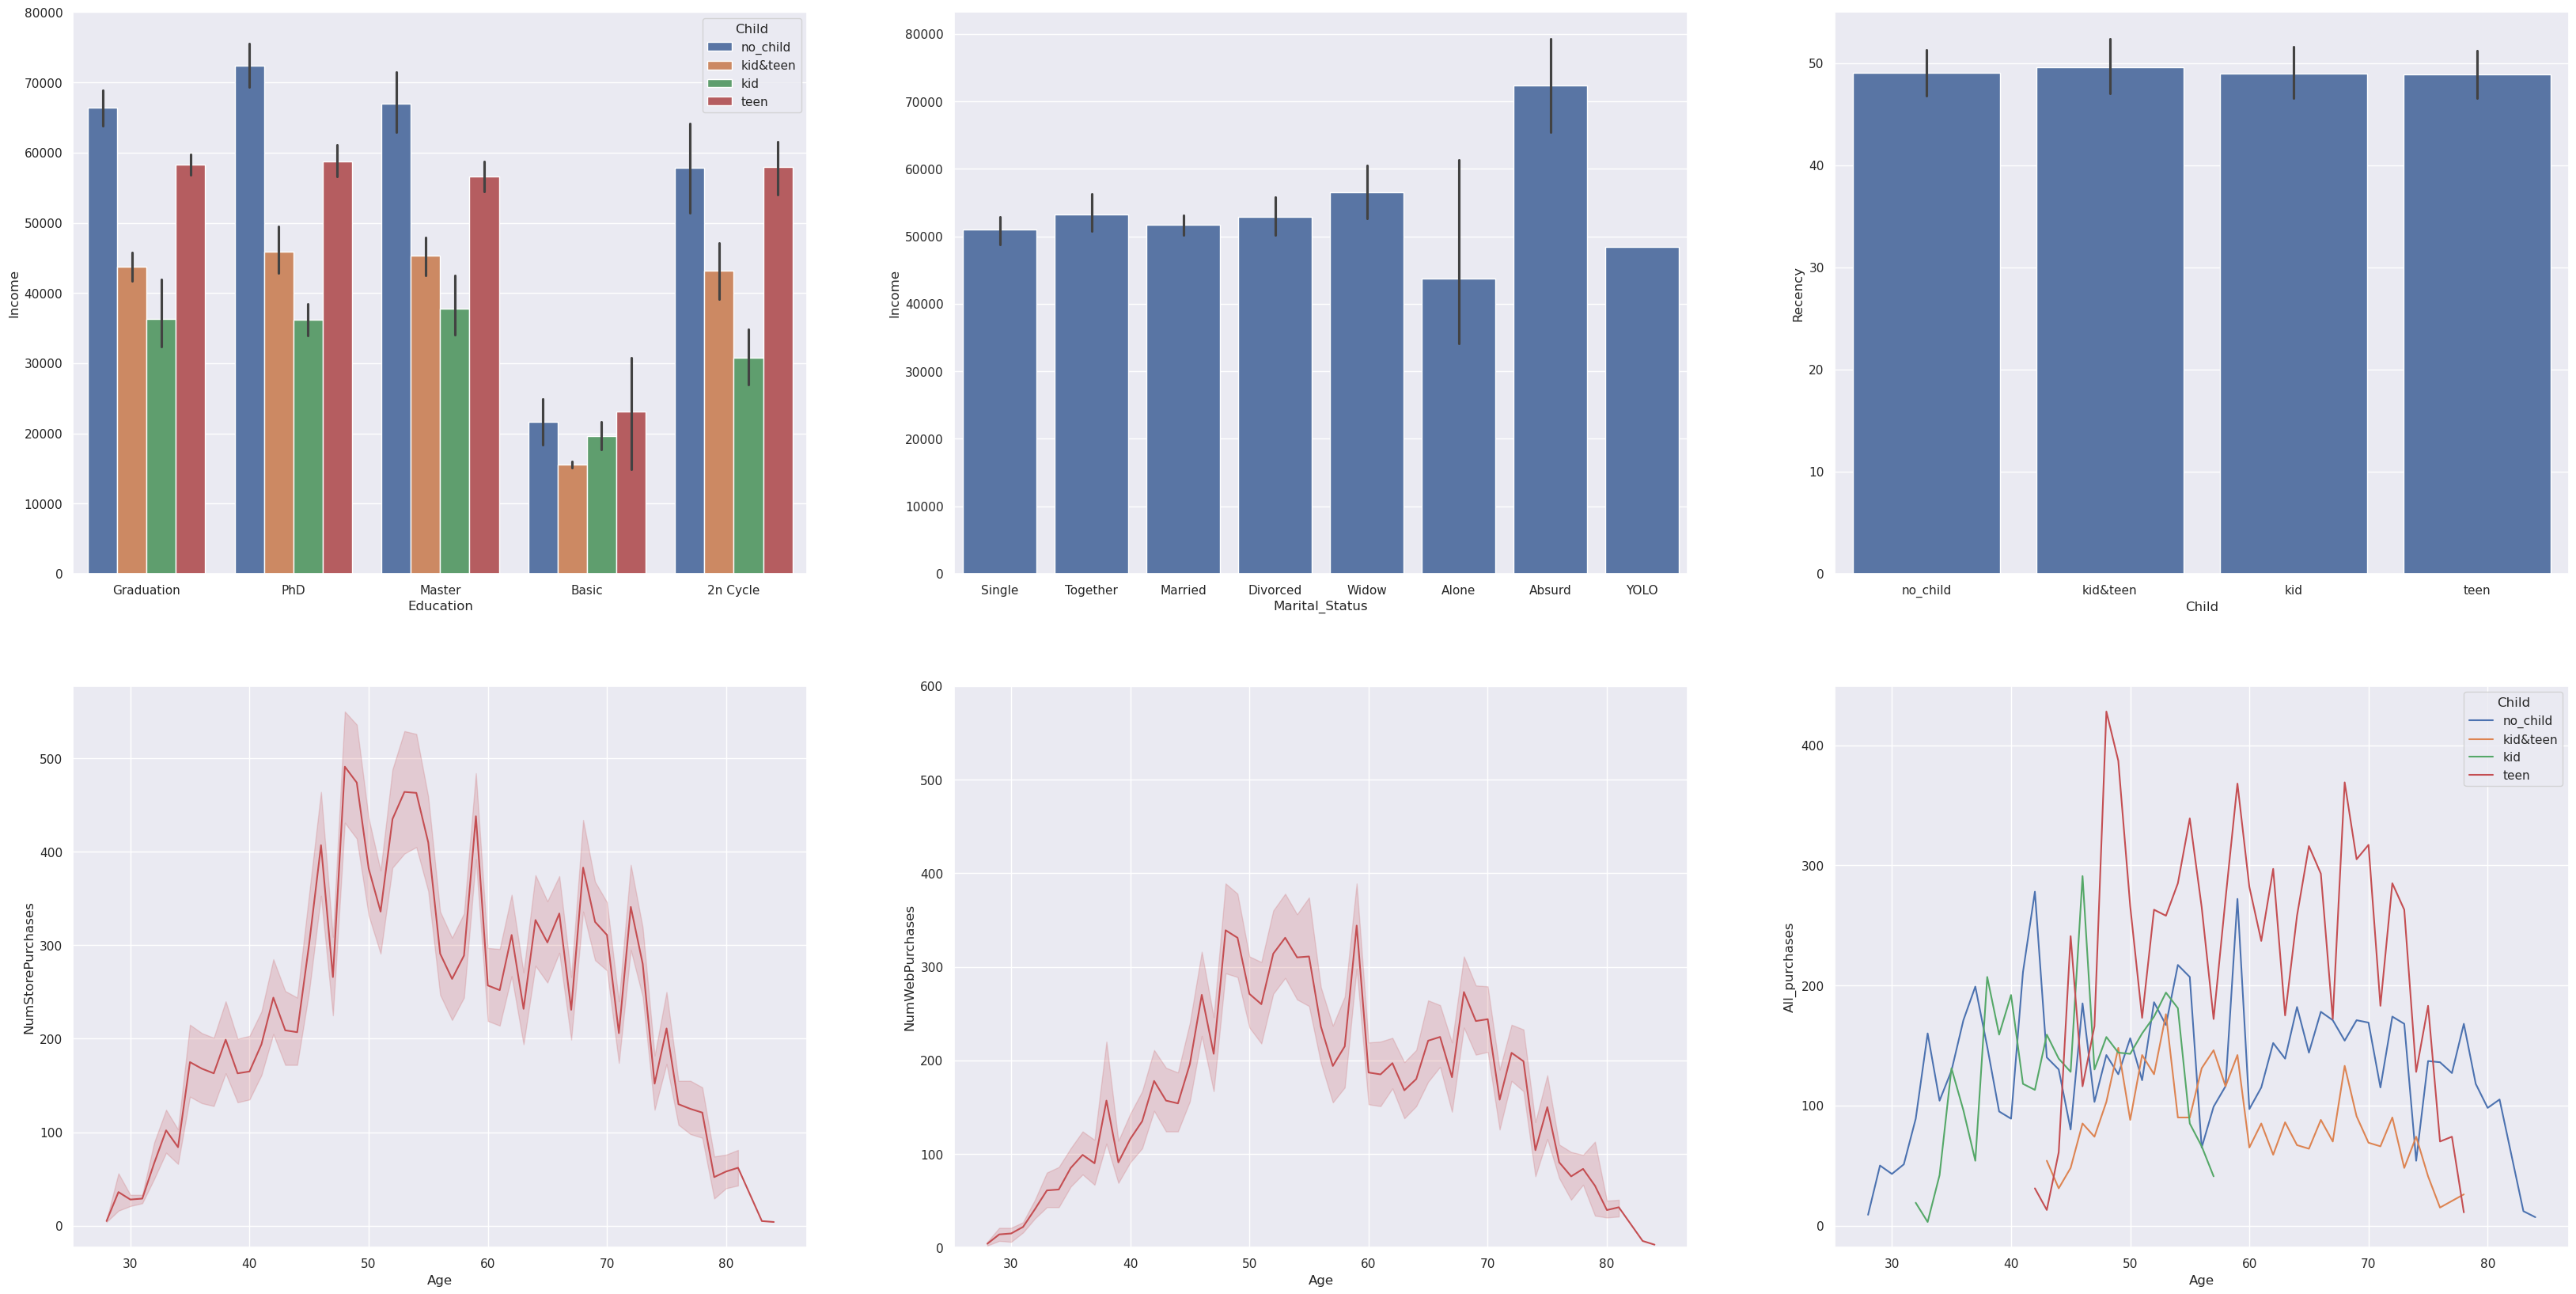

In [4]:
sns.set(rc={'figure.figsize':(40.7,20.27)})
df = pd.read_csv('marketing_campaign.csv', sep=';')
df['Age'] = 2024 - df['Year_Birth'].astype(int)
df["Child"] = df.apply(lambda x: "kid&teen" if (x["Kidhome"] > 0) & (x["Teenhome"] > 0) else "kid" if x["Kidhome"] > 0 else "teen" if x["Teenhome"] > 0 else "no_child", axis = 1)
sns.set(color_codes=True)
df["All_purchases"] = df["NumStorePurchases"] + df["NumWebPurchases"]

plt.subplot(2, 3, 1)
plt.ylim(0, 80000)
sns.barplot(data=df, x='Education', y="Income", hue = "Child") #среднее значение годового дохода по обучению
plt.subplot(2, 3, 2)
sns.barplot(data=df, x='Marital_Status', y="Income") #среднее значение годового дохода по семейному положению
plt.subplot(2, 3, 3)
sns.barplot(data=df, x="Child", y="Recency") #как давно в среднем что-то покупали люди с разными детьми

data = df.loc[df["Age"] < 90]
plt.subplot(2, 3, 4)
sns.lineplot(x=data["Age"], y="NumStorePurchases", data=df, color="r", estimator=np.sum) #сумма оффлайн покупок
plt.subplot(2, 3, 5)
plt.ylim(0, 600)
sns.lineplot(x=data["Age"], y="NumWebPurchases", data=df, color="r", estimator=np.sum) #сумма онлайн покупок
plt.subplot(2, 3, 6)
sns.lineplot(x=data["Age"], y="All_purchases", data=df, estimator=np.sum, hue = "Child", errorbar=None) #среднее значение оплаты за все покупки в компании для людей разных возрастов, с детьми или без


1-2) делаем вывод, что больше всего в среднем зарабатывают люди, со статусом "Absurd" и образованием либо "Graduation", либо "PhD", либо "Master" \
также больше всего получают люди, у которых нет детей \
4-5) люди совершают больше оффлайн покупок и при этом чаще всего это люди от 45 до 75 лет \
6) больше всего денег за покупки отдали люди живущие с подростками

Посмотрим по категориям товаров кто больше всего тратит денег в магазине. Эти люди и будут целевой аудиторией данной продукции.
Составим кучу графиков (как соптимизировать этот момент я не знаю)

<Axes: xlabel='Income', ylabel='MntGoldProds'>

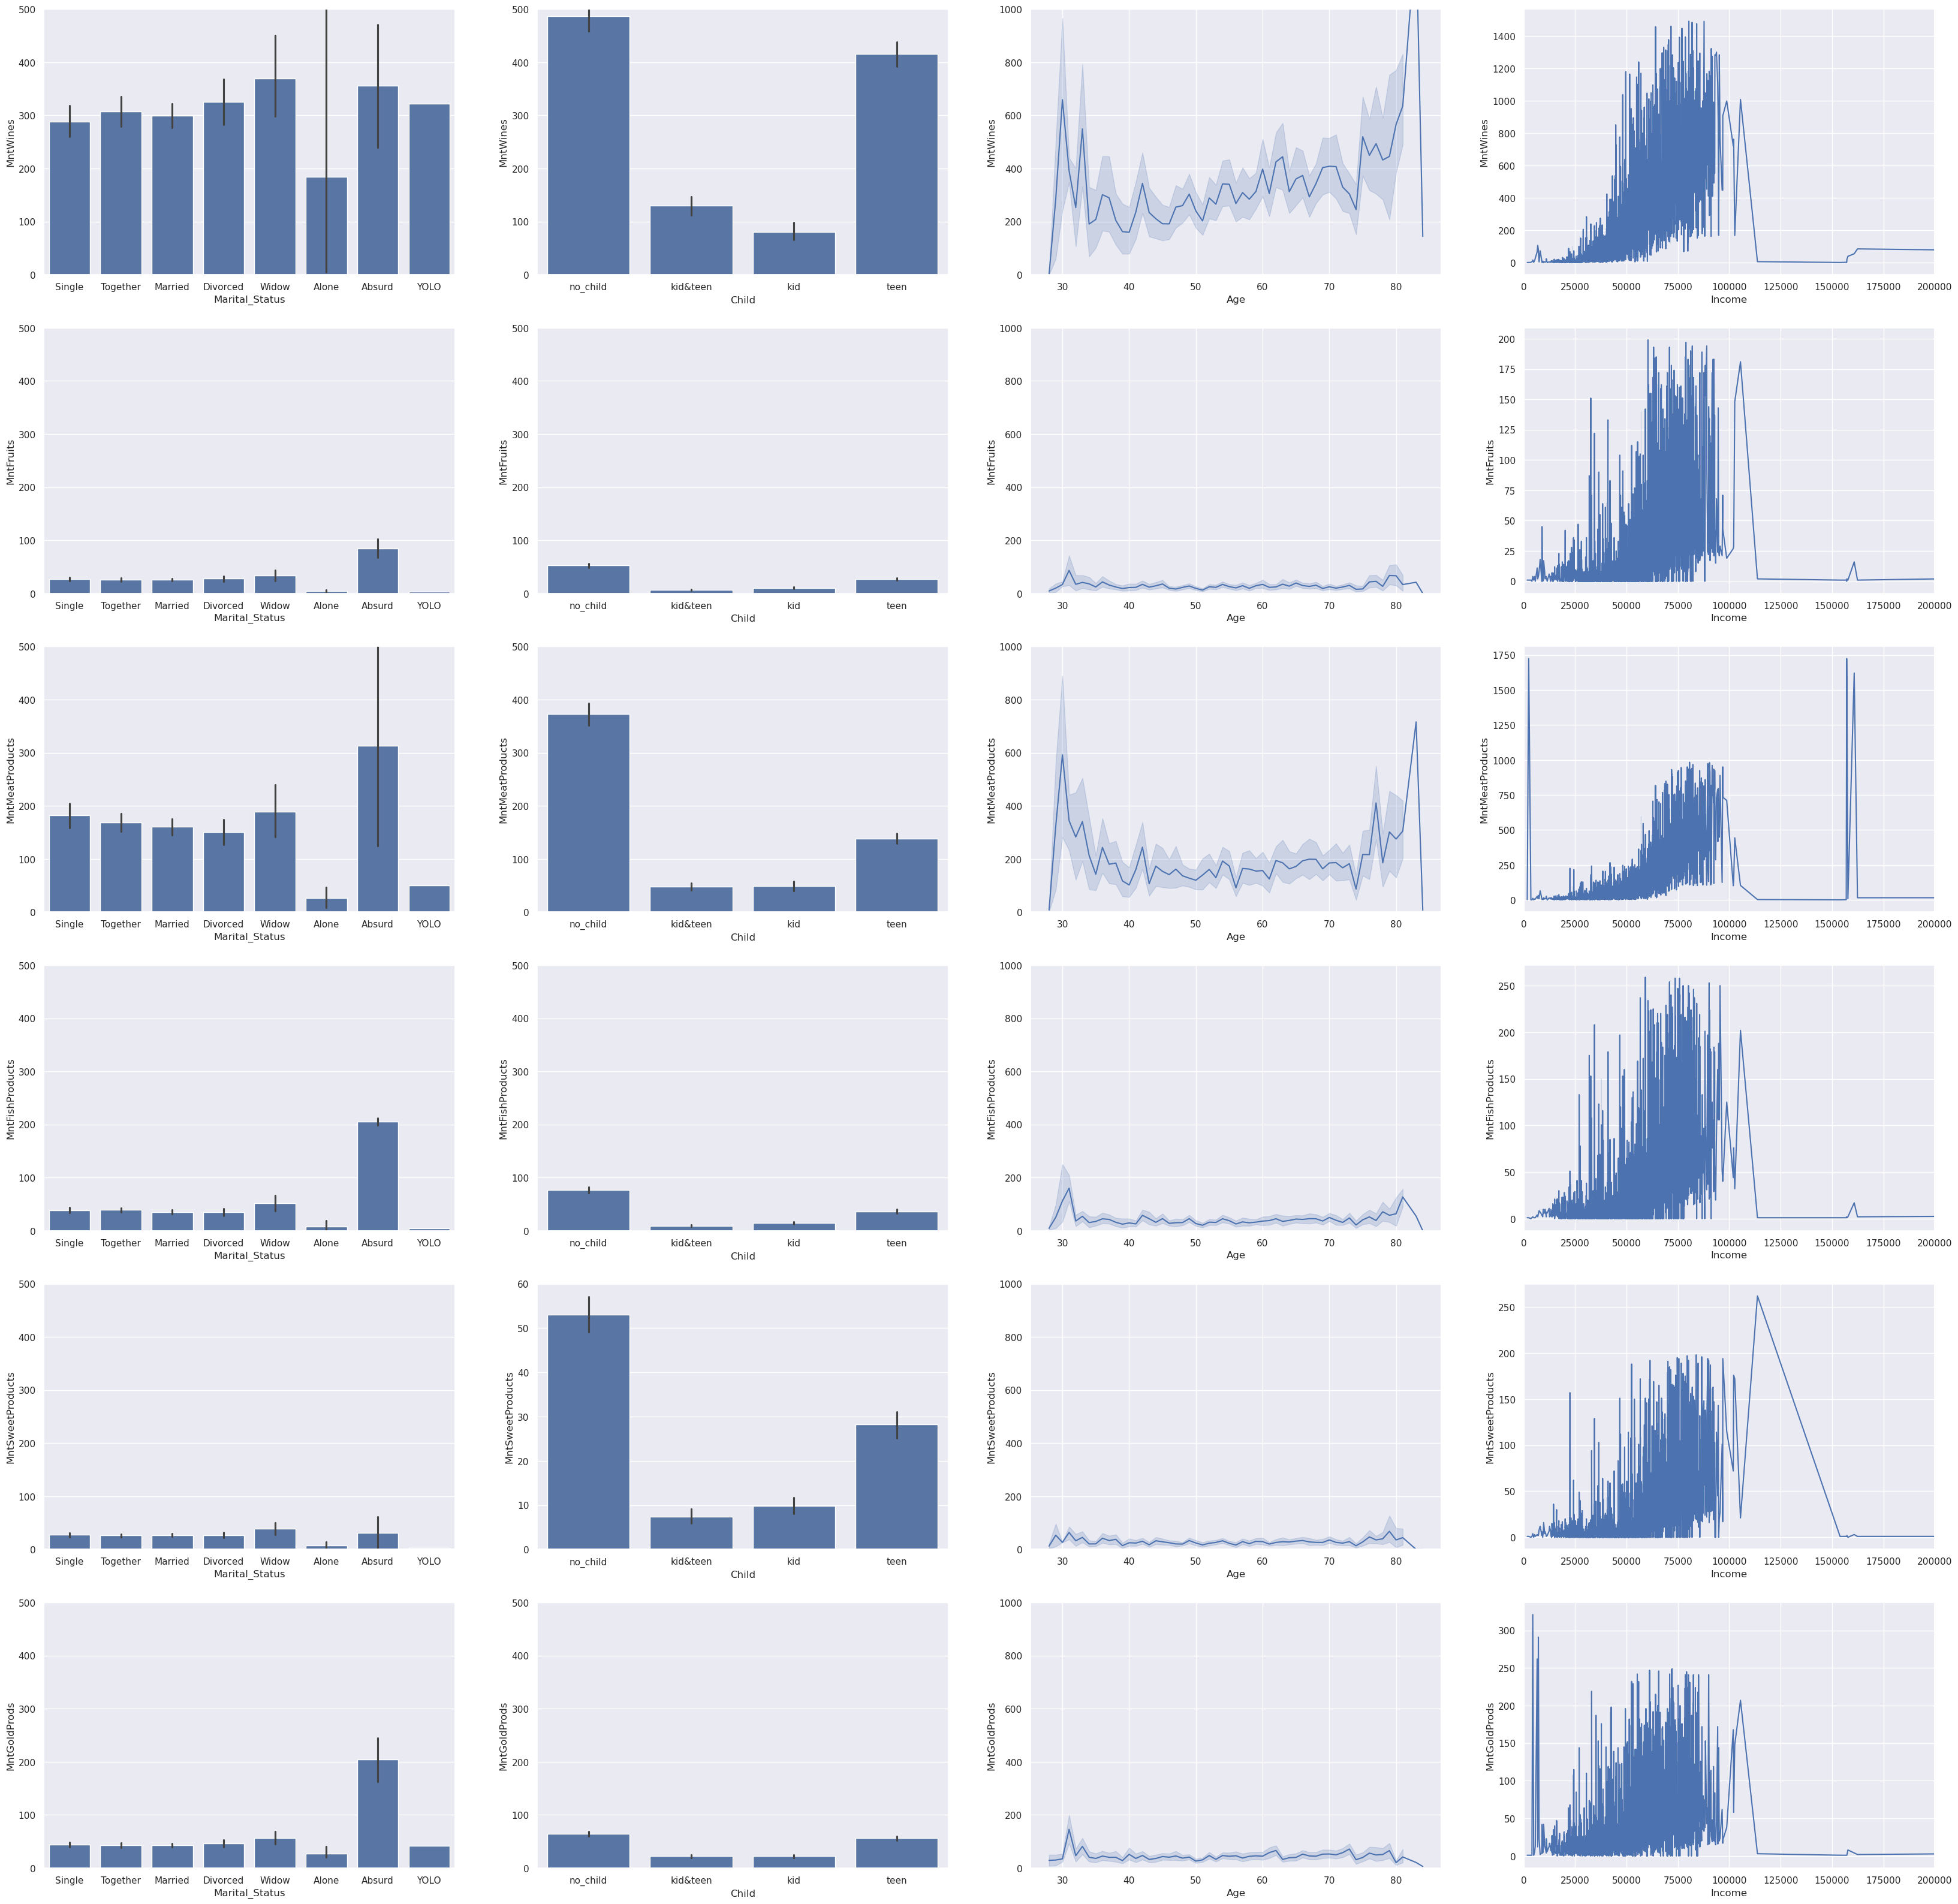

In [5]:
sns.set(rc={'figure.figsize':(40.7,40.27)})

plt.subplot(6, 4, 1)
plt.ylim(0, 500)
sns.barplot(x='Marital_Status', y='MntWines', data=df)
plt.subplot(6, 4, 2)
plt.ylim(0, 500)
sns.barplot(x='Child', y='MntWines', data=df)
plt.subplot(6, 4, 3)
plt.ylim(0, 1000)
sns.lineplot(x=data['Age'], y='MntWines', data=df)
plt.subplot(6, 4, 4)
plt.xlim(0, 200000)
sns.lineplot(x='Income', y='MntWines', data=df)

plt.subplot(6, 4, 5)
plt.ylim(0, 500)
sns.barplot(x='Marital_Status', y='MntFruits', data=df)
plt.subplot(6, 4, 6)
plt.ylim(0, 500)
sns.barplot(x='Child', y='MntFruits', data=df)
plt.subplot(6, 4, 7)
plt.ylim(0, 1000)
sns.lineplot(x=data['Age'], y='MntFruits', data=df)
plt.subplot(6, 4, 8)
plt.xlim(0, 200000)
sns.lineplot(x='Income', y='MntFruits', data=df)

plt.subplot(6, 4, 9)
plt.ylim(0, 500)
sns.barplot(x='Marital_Status', y='MntMeatProducts', data=df)
plt.subplot(6, 4, 10)
plt.ylim(0, 500)
sns.barplot(x='Child', y='MntMeatProducts', data=df)
plt.subplot(6, 4, 11)
plt.ylim(0, 1000)
sns.lineplot(x=data['Age'], y='MntMeatProducts', data=df)
plt.subplot(6, 4, 12)
plt.xlim(0, 200000)
sns.lineplot(x='Income', y='MntMeatProducts', data=df)

plt.subplot(6, 4, 13)
plt.ylim(0, 500)
sns.barplot(x='Marital_Status', y='MntFishProducts', data=df)
plt.subplot(6, 4, 14)
plt.ylim(0, 500)
sns.barplot(x='Child', y='MntFishProducts', data=df)
plt.subplot(6, 4, 15)
plt.ylim(0, 1000)
sns.lineplot(x=data['Age'], y='MntFishProducts', data=df)
plt.subplot(6, 4, 16)
plt.xlim(0, 200000)
sns.lineplot(x='Income', y='MntFishProducts', data=df)

plt.subplot(6, 4, 17)
plt.ylim(0, 500)
sns.barplot(x='Marital_Status', y='MntSweetProducts', data=df)
plt.subplot(6, 4, 18)
sns.barplot(x='Child', y='MntSweetProducts', data=df)
plt.subplot(6, 4, 19)
plt.ylim(0, 1000)
sns.lineplot(x=data['Age'], y='MntSweetProducts', data=df)
plt.subplot(6, 4, 20)
plt.xlim(0, 200000)
sns.lineplot(x='Income', y='MntSweetProducts', data=df)

plt.subplot(6, 4, 21)
plt.ylim(0, 500)
sns.barplot(x='Marital_Status', y='MntGoldProds', data=df)
plt.subplot(6, 4, 22)
plt.ylim(0, 500)
sns.barplot(x='Child', y='MntGoldProds', data=df)
plt.subplot(6, 4, 23)
plt.ylim(0, 1000)
sns.lineplot(x=data['Age'], y='MntGoldProds', data=df)
plt.subplot(6, 4, 24)
plt.xlim(0, 200000)
sns.lineplot(x='Income', y='MntGoldProds', data=df)


В основном продукты приобретают люди в положении "Absurd", не имеющие детей или живущие с подростком, которым около 30 лет или 80+ \
Они больше всего предпочитают вино и мясную продукцию \
Посмотрим на то, предпочитают ли они совершать покупки на сайте, используя каталог или в самом магазине:

In [6]:
sns.set(rc={'figure.figsize':(7.7,10.27)})
sum_web_site = df.loc[((df['Marital_Status'] == "Absurd") | (df['Child'] == "teen") | (df['Child'] == "no_child")) & (df['Age'] < 35), "NumWebPurchases"].sum()
sum_catalog = df.loc[((df['Marital_Status'] == "Absurd") | (df['Child'] == "teen") | (df['Child'] == "no_child")) & (df['Age'] < 35), "NumCatalogPurchases"].sum()
sum_store = df.loc[((df['Marital_Status'] == "Absurd") | (df['Child'] == "teen") | (df['Child'] == "no_child")) & (df['Age'] < 35), "NumStorePurchases"].sum()
print(sum_web_site, sum_catalog, sum_store)

sum_web_site = df.loc[((df['Marital_Status'] == "Absurd") | (df['Child'] == "teen") | (df['Child'] == "no_child")) & (df['Age'] > 75), "NumWebPurchases"].sum()
sum_catalog = df.loc[((df['Marital_Status'] == "Absurd") | (df['Child'] == "teen") | (df['Child'] == "no_child")) & (df['Age'] > 75), "NumCatalogPurchases"].sum()
sum_store = df.loc[((df['Marital_Status'] == "Absurd") | (df['Child'] == "teen") | (df['Child'] == "no_child")) & (df['Age'] > 75), "NumStorePurchases"].sum()
print(sum_web_site, sum_catalog, sum_store)

187 210 319
392 327 545


из этих данных можем сделать вывод, что наша ЦА любит покупать продукты непосредственно в магазине и например рекламу нового продукта стоит также делать как-то в формате оффлайн. \
ИТОГО таблица с целевой аудиторией (ID покупателей):

In [7]:
df.loc[((df['Marital_Status'] == "Absurd") | (df['Child'] == "teen") | (df['Child'] == "no_child")) & ((df['Age'] < 35) | (df['Age'] > 75)) & (df["NumStorePurchases"] > df["NumCatalogPurchases"]) & (df["NumStorePurchases"] > df["NumWebPurchases"])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Child,All_purchases
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,1,1,0,0,3,11,1,78,no_child,19
17,4939,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,...,0,0,0,0,3,11,0,78,no_child,10
34,8755,1946,Master,Married,68657.0,0,0,2013-02-20,4,482,...,0,0,0,0,3,11,0,78,no_child,12
113,999,1991,Graduation,Single,86037.0,0,0,2013-01-02,95,490,...,1,0,0,0,3,11,1,33,no_child,17
140,821,1992,Master,Single,92859.0,0,0,2012-10-19,46,962,...,0,0,0,0,3,11,0,32,no_child,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,3520,1990,Master,Single,91172.0,0,0,2013-03-27,94,162,...,1,1,1,0,3,11,1,34,no_child,11
2192,7990,1947,Graduation,Married,27469.0,0,0,2012-08-02,2,9,...,0,0,0,0,3,11,0,77,no_child,3
2204,1876,1990,Graduation,Married,18929.0,0,0,2013-02-16,15,32,...,0,0,0,0,3,11,0,34,no_child,5
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,0,0,0,0,3,11,0,29,no_child,12
